# Bioinformatics Drug Discovery ML Project Using ChemBL data

## **1. Introduction**

In this exercise, we'll explore a simple workflow to perform ML/AI-assisted drug discovery prediction, as demonstrated in the vlog tutorial [1]. The ML model were built using a dataset created from ChEMBL bioactivity database [2]. ChEMBL is a public database containing manually curated bioactivity data of tested compounds against variety of biological targets. For this exercise, we'll use 'coronavirus' as the target search query, to build a dataset with all available molecules in ChEMBL having drug-like properties against this target. Additional features for ML model building were estimated using open source AI-predicted cheminformatics data, which are often used in the field of computational chemistry and/or drug discovery [3-7]. 

#### **1.1. Install and load database and all the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import ChEMBL Database
! pip install chembl_webresource_client -q
from chembl_webresource_client.new_client import new_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 3.5 MB/s eta 0:00:00


In [3]:
# import molecular descriptor package to add feature 
! pip install rdkit -q

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, Fingerprints, Lipinski
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from IPython.display import SVG,Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 17.7 MB/s eta 0:00:00


In [4]:
# find data for target of interest

target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [5]:
selected_target = targets.target_chembl_id[7]
selected_target

'CHEMBL4523582'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')
type(res)

chembl_webresource_client.query_set.QuerySet

In [7]:
df1 = pd.DataFrame.from_dict(res)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   activity_comment           118 non-null    object
 1   activity_id                203 non-null    int64 
 2   activity_properties        203 non-null    object
 3   assay_chembl_id            203 non-null    object
 4   assay_description          203 non-null    object
 5   assay_type                 203 non-null    object
 6   assay_variant_accession    0 non-null      object
 7   assay_variant_mutation     0 non-null      object
 8   bao_endpoint               203 non-null    object
 9   bao_format                 203 non-null    object
 10  bao_label                  203 non-null    object
 11  canonical_smiles           196 non-null    object
 12  data_validity_comment      0 non-null      object
 13  data_validity_description  0 non-null      object
 14  document_c

In [8]:
# drop na
df2 = df1[df1.standard_value.notna()]
df2.T

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
activity_comment,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,Dtt Insensitive,...,None,None,None,None,None,None,None,None,None,None
activity_id,19964199,19964200,19964201,19964202,19964203,19964204,19964205,19964206,19964207,19964208,...,23254362,23254363,23254364,23254365,23254366,23254367,23254368,23254369,23254370,23254371
activity_properties,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
assay_chembl_id,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,CHEMBL4495583,...,CHEMBL4831802,CHEMBL4831802,CHEMBL4831802,CHEMBL4831802,CHEMBL4831803,CHEMBL4831803,CHEMBL4831803,CHEMBL4831803,CHEMBL4831803,CHEMBL4831803
assay_description,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...,Inhibition of SARS-CoV-2 RdRp transfected in h...
assay_type,F,F,F,F,F,F,F,F,F,F,...,B,B,B,B,B,B,B,B,B,B
assay_variant_accession,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
assay_variant_mutation,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
bao_endpoint,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,...,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190
bao_format,BAO_0000019,BAO_0000019,BAO_0000019,BAO_0000019,BAO_0000019,BAO_0000019,BAO_0000019,BAO_0000019,BAO_0000019,BAO_0000019,...,BAO_0000219,BAO_0000219,BAO_0000219,BAO_0000219,BAO_0000219,BAO_0000219,BAO_0000219,BAO_0000219,BAO_0000219,BAO_0000219


### **1.2. Pre-process Dataset and Add Model Features with Cheminformatics Molecular Descriptor Estimates**

####**1.2.1. Pre-process dataset: bin activity data into 3 categories**

In [9]:
# check lowest and highest IC50 vals
df2.standard_value = df2.standard_value.astype(float)
(df2.standard_value.min(), df2.standard_value.max())

<ipython-input-9-4d900cb70cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.standard_value = df2.standard_value.astype(float)


(8.0, 100000.0)

In [10]:
# classify activity into 3 bins: active, intermediate and inactive
labels = ['active', 'intermediate', 'inactive'] 
bins = [0, 500, 5000, float('inf')] # ~ no of inactive molecules rather imbalance with IC50={1000,10000}, 
                                      ## so define intermediate class between {500-5000nM} to spread the counts more evenly. 

df2.loc[:,'bioactivity_class'] = pd.cut(df2.loc[:,'standard_value'], bins, labels=labels)

<ipython-input-10-6c95d442e3f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'bioactivity_class'] = pd.cut(df2.loc[:,'standard_value'], bins, labels=labels)


In [11]:
# select columns for model feature
feature_col = ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'bioactivity_class']
df = df2[feature_col]
df.bioactivity_class.value_counts()

intermediate    88
active          65
inactive        49
Name: bioactivity_class, dtype: int64

In [12]:
# find active molecules with IC50 <= 10 nM
df[(df.standard_value<=10)]

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
17,CHEMBL3963349,COC(=O)CC[C@H](NC(=O)[C@H](CC(=O)OC)NC(=O)OCc1...,10.0,active
93,CHEMBL508338,None,10.0,active
103,CHEMBL1333953,None,10.0,active
129,CHEMBL4777223,COc1cccc2[nH]c(C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H...,8.0,active
131,CHEMBL4852855,C[C@@H](OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)...,9.0,active


In [13]:
# some molecules has no canonical_smiles!
df.canonical_smiles.isna().sum()

7

In [14]:
df = df.dropna()

In [15]:
df = df.reset_index() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               195 non-null    int64   
 1   molecule_chembl_id  195 non-null    object  
 2   canonical_smiles    195 non-null    object  
 3   standard_value      195 non-null    float64 
 4   bioactivity_class   195 non-null    category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 6.5+ KB


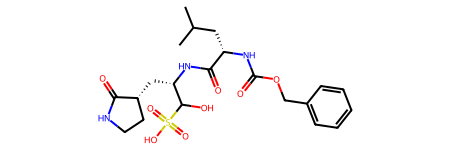

In [16]:
# display an active molecule
mol = Chem.MolFromSmiles(df.canonical_smiles.iloc[131])
display(mol)

#### **1.2.2. Estimate Lipinski Descriptors**

In [17]:
# calculate Lipinski descriptors

def isLipinski(mol):
  donor = Lipinski.NumHDonors(mol)
  acceptor = Lipinski.NumHAcceptors(mol)
  mw = Lipinski.rdMolDescriptors.CalcExactMolWt(mol)
  lgP = Lipinski.rdMolDescriptors.CalcCrippenDescriptors(mol)[0]
  
  if donor <=5 and acceptor <=10 and mw <500 and lgP <= 5 :
    return 1
  else: 
    return 0


In [18]:
import warnings
warnings.filterwarnings('ignore')

df['molecule'] = df.canonical_smiles.apply(Chem.MolFromSmiles)
df['donor'] = df.molecule.apply(Lipinski.NumHDonors)
df['acceptor'] = df.molecule.apply(Lipinski.NumHAcceptors)
df['mw'] = df.molecule.apply(Lipinski.rdMolDescriptors.CalcExactMolWt)
df['logp'] = df.molecule.apply(Lipinski.rdMolDescriptors.CalcCrippenDescriptors)
df.logp = df.logp.str.get(0)
df['is_lipinski'] = df.molecule.apply(isLipinski)

In [19]:
df.sample(3).T

,82,94,24
index,85,98,24
molecule_chembl_id,CHEMBL4303312,CHEMBL2107818,CHEMBL508112
canonical_smiles,Oc1c(I)cc(I)c(O)c1I,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,c1ccc2sc(SSc3nc4ccccc4s3)nc2c1
standard_value,330.0,580.0,160.0
bioactivity_class,active,intermediate,active
molecule,<rdkit.Chem.rdchem.Mol object at 0x7f0a1af4bcf0>,<rdkit.Chem.rdchem.Mol object at 0x7f0a1af4c270>,<rdkit.Chem.rdchem.Mol object at 0x7f0a1af49350>
donor,2,7,0
acceptor,2,15,6
mw,487.726723,750.274837,331.957032
logp,2.9116,0.3898,5.7054


<Axes: >

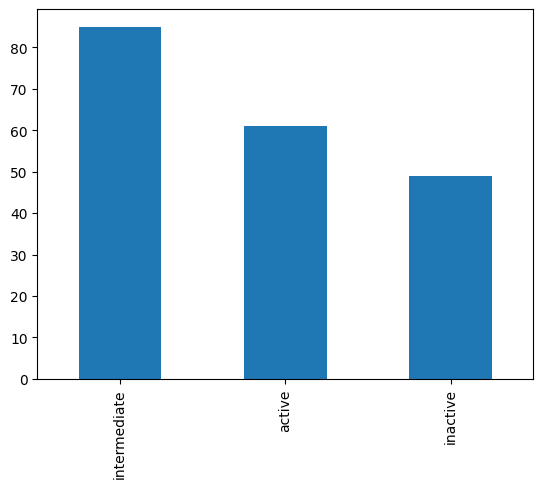

In [20]:
df['bioactivity_class'].value_counts().plot(kind='bar')

#### **1.2.3. Estimate Molecular Fingerprints using PaDel Descriptor**
#### a. Install Padelpy and download fingerprints XML files

In [21]:
# install padelpy and prepare fingerprints XML

! pip install padelpy -q
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip 
! unzip fingerprints_xml.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 46.0 MB/s eta 0:00:00
--2023-03-31 14:44:31--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2023-03-31 14:44:31--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2023-03-31 14:44:31 (6

In [22]:
# list and sort fingerprint XML files
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [23]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [24]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

#### b. Calculate PaDel descriptors

In [25]:
# prepare an input file for PaDel from df by subsetting canonical_smiles & ChEMBL_id
df3 = df[['canonical_smiles','molecule_chembl_id']]
df3.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [26]:
df3.head(10)

,canonical_smiles,molecule_chembl_id
0,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,CHEMBL480
1,Cc1c(-c2cnccn2)ssc1=S,CHEMBL178459
2,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,CHEMBL3545157
3,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,CHEMBL297453
4,O=C1C=Cc2cc(Br)ccc2C1=O,CHEMBL4303595
5,CC(CN1CC(=O)NC(=O)C1)N1CC(=O)NC(=O)C1,CHEMBL444186
6,Nc1ccc2cc3ccc(N)cc3nc2c1,CHEMBL55400
7,CCOC(=O)Cc1ccc(-c2ccccc2)cc1,CHEMBL1886408
8,O=[N+]([O-])c1ccc(Sc2cccc[n+]2[O-])c2nonc12,CHEMBL505670
9,CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O,CHEMBL460499


In [27]:
from padelpy import padeldescriptor

fingerprint = 'Substructure' # 'PubChem'
     # Pubchem fp: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-017-0195-1

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [28]:
padel_descriptors = pd.read_csv(fingerprint_output_file)
padel_descriptors.columns = padel_descriptors.columns.str.replace('Name','molecule_chembl_id') 
padel_descriptors.head(5)

,molecule_chembl_id,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL480,1,0,0,0,0,0,0,0,1,...,1,1,1,1,1,0,0,0,0,1
1,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,1
2,CHEMBL3545157,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,CHEMBL297453,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,CHEMBL4303595,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


In [29]:
# check shape of padel_descriptor
np.shape(padel_descriptors)

(195, 308)

In [30]:
# remove fingerprints with low variants
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

padel_descriptors = pd.concat([padel_descriptors.iloc[:,0],remove_low_variance(padel_descriptors.iloc[:,1:], threshold=0.1)], axis=1,
                              verify_integrity=True)                                                             # (0.8 *(1-0.8))

#### **1.2.4. Apply log transform on IC50 data to reduce feature skewness**

In [31]:
df['pIC50'] = df.standard_value.apply(np.log)

In [32]:
df.pIC50.describe()

count    195.000000
mean       7.289381
std        2.300148
min        2.079442
25%        5.627207
50%        7.450080
75%        8.550884
max       11.512925
Name: pIC50, dtype: float64

In [33]:
df.standard_value.describe()

count       195.000000
mean      13131.579487
std       30065.957743
min           8.000000
25%         278.000000
50%        1720.000000
75%        5175.000000
max      100000.000000
Name: standard_value, dtype: float64

#### __1.2.5. Combine df with padel_descriptors__

In [34]:
padel_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  195 non-null    object
 1   SubFP1              195 non-null    int64 
 2   SubFP2              195 non-null    int64 
 3   SubFP3              195 non-null    int64 
 4   SubFP12             195 non-null    int64 
 5   SubFP18             195 non-null    int64 
 6   SubFP20             195 non-null    int64 
 7   SubFP38             195 non-null    int64 
 8   SubFP49             195 non-null    int64 
 9   SubFP88             195 non-null    int64 
 10  SubFP96             195 non-null    int64 
 11  SubFP99             195 non-null    int64 
 12  SubFP100            195 non-null    int64 
 13  SubFP127            195 non-null    int64 
 14  SubFP137            195 non-null    int64 
 15  SubFP143            195 non-null    int64 
 16  SubFP169            195 no

In [35]:
df4 = df.copy()

In [36]:
df4 = pd.concat([df4,padel_descriptors], axis=1, keys='molecule_chembl_id', verify_integrity=True)
df4.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   (m, index)               195 non-null    int64   
 1   (m, molecule_chembl_id)  195 non-null    object  
 2   (m, canonical_smiles)    195 non-null    object  
 3   (m, standard_value)      195 non-null    float64 
 4   (m, bioactivity_class)   195 non-null    category
 5   (m, molecule)            195 non-null    object  
 6   (m, donor)               195 non-null    int64   
 7   (m, acceptor)            195 non-null    int64   
 8   (m, mw)                  195 non-null    float64 
 9   (m, logp)                195 non-null    float64 
 10  (m, is_lipinski)         195 non-null    int64   
 11  (m, pIC50)               195 non-null    float64 
 12  (o, molecule_chembl_id)  195 non-null    object  
 13  (o, SubFP1)              195 non-null    int64   
 14  (o, SubFP2

In [37]:
# rename columns with the second element of tuple
df4.columns = [i[1] for i in df4.columns]
df4.columns

Index(['index', 'molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'bioactivity_class', 'molecule', 'donor', 'acceptor', 'mw', 'logp',
       'is_lipinski', 'pIC50', 'molecule_chembl_id', 'SubFP1', 'SubFP2',
       'SubFP3', 'SubFP12', 'SubFP18', 'SubFP20', 'SubFP38', 'SubFP49',
       'SubFP88', 'SubFP96', 'SubFP99', 'SubFP100', 'SubFP127', 'SubFP137',
       'SubFP143', 'SubFP169', 'SubFP170', 'SubFP179', 'SubFP181', 'SubFP184',
       'SubFP275', 'SubFP287', 'SubFP303'],
      dtype='object')

In [38]:
df4 = df4.drop(['molecule_chembl_id', 'canonical_smiles', 'standard_value','molecule'], axis=1) #,'molecule_chembl_id'
df4.head().T

,0,1,2,3,4
index,0,1,2,3,4
bioactivity_class,active,active,active,intermediate,active
donor,1,0,0,8,0
acceptor,4,5,5,11,2
mw,369.075882,225.969311,334.077599,458.084911,235.947292
logp,3.51522,3.30451,3.2622,2.2332,2.2277
is_lipinski,1,1,1,0,1
pIC50,5.966147,5.347108,4.382027,7.36518,3.688879
SubFP1,1,1,0,0,0
SubFP2,0,0,0,1,0


In [39]:
def minmax(a,min,max):
  return ((a-min)/(max-min))

In [40]:
scale_col = ['donor','acceptor', 'mw', 'logp','pIC50']
for i in scale_col:
  a = np.min(df4[i])
  b = np.max(df4[i])
  df4[i] = df4[i].apply(minmax,args=(a,b))

In [41]:
#df4.head()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              195 non-null    int64   
 1   bioactivity_class  195 non-null    category
 2   donor              195 non-null    float64 
 3   acceptor           195 non-null    float64 
 4   mw                 195 non-null    float64 
 5   logp               195 non-null    float64 
 6   is_lipinski        195 non-null    int64   
 7   pIC50              195 non-null    float64 
 8   SubFP1             195 non-null    int64   
 9   SubFP2             195 non-null    int64   
 10  SubFP3             195 non-null    int64   
 11  SubFP12            195 non-null    int64   
 12  SubFP18            195 non-null    int64   
 13  SubFP20            195 non-null    int64   
 14  SubFP38            195 non-null    int64   
 15  SubFP49            195 non-null    int64   
 16  SubFP88 

## **1.3. Split Train and Test Dataset**
### **1.3.1. Classification**

In [42]:
from sklearn.utils import shuffle
ranstat=123
df4 = shuffle(df4, random_state=ranstat)

y1 = df4.bioactivity_class.map({'inactive':0,'intermediate':1,'active':2})
X1 = df4.drop(['bioactivity_class','pIC50'], axis=1)

In [43]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=.25,random_state =ranstat)
print(X1_train.shape, X1_test.shape)
print(y1_train.shape, y1_test.shape)

(146, 29) (49, 29)
(146,) (49,)


### **1.3.2. Regression**

In [44]:
y2 = df4.pIC50
X2 = df4.drop(['bioactivity_class','pIC50'], axis=1)

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=.25,random_state =ranstat)
print(X2_train.shape, X2_test.shape)
print(y2_train.shape, y2_test.shape)

(146, 29) (49, 29)
(146,) (49,)


## __2. Model Building__
### __2.1. Classification__

In [46]:
! pip install lazypredict -q
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
clfmodels, clfpredictions = clf.fit(X1_train, X1_test, y1_train, y1_test)

100%|██████████| 29/29 [00:01<00:00, 16.87it/s]


In [47]:
clfmodels # ROCAUC score is none because of multiclass

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.78,None,0.80,0.11
XGBClassifier,0.76,0.76,None,0.76,0.25
LabelPropagation,0.76,0.76,None,0.75,0.05
LabelSpreading,0.76,0.76,None,0.75,0.05
DecisionTreeClassifier,0.76,0.75,None,0.76,0.02
BaggingClassifier,0.76,0.75,None,0.74,0.05
ExtraTreesClassifier,0.76,0.73,None,0.75,0.15
ExtraTreeClassifier,0.71,0.72,None,0.72,0.02
QuadraticDiscriminantAnalysis,0.69,0.71,None,0.69,0.04


In [48]:
# Re-run XGB classifier
from xgboost import XGBClassifier
xgbm = XGBClassifier() # use default hyperparams
xgbm.fit(X1_train,y1_train)
y1_pred = xgbm.predict(X1_test)

from sklearn.metrics import classification_report

target_names = ['Inactive', 'Intermediate', 'Active']
print(classification_report(y1_test, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

    Inactive       1.00      0.73      0.84        11
Intermediate       0.75      0.71      0.73        21
      Active       0.67      0.82      0.74        17

    accuracy                           0.76        49
   macro avg       0.81      0.76      0.77        49
weighted avg       0.78      0.76      0.76        49



In [49]:
# Re-run AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
abcm = AdaBoostClassifier()  # just use default hyperparams
abcm.fit(X1_train,y1_train)
y1_pred = abcm.predict(X1_test)

target_names = ['Inactive', 'Intermediate', 'Active']
print(classification_report(y1_test, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

    Inactive       0.55      0.55      0.55        11
Intermediate       0.28      0.24      0.26        21
      Active       0.45      0.53      0.49        17

    accuracy                           0.41        49
   macro avg       0.42      0.44      0.43        49
weighted avg       0.40      0.41      0.40        49



### **2.2. Regression**

In [50]:
from lazypredict.Supervised import LazyRegressor
est = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
regmodels,regpredictions = est.fit(X2_train, X2_test, y2_train, y2_test)

100%|██████████| 42/42 [00:03<00:00, 12.86it/s]


In [51]:
regmodels

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,0.17,0.67,0.13,0.03
KNeighborsRegressor,0.01,0.61,0.14,0.02
SVR,-0.05,0.59,0.15,0.02
RandomForestRegressor,-0.28,0.49,0.16,0.34
LGBMRegressor,-0.33,0.47,0.17,0.07
BaggingRegressor,-0.41,0.44,0.17,0.04
HistGradientBoostingRegressor,-0.47,0.42,0.18,0.11
AdaBoostRegressor,-0.56,0.38,0.18,0.10
XGBRegressor,-0.58,0.37,0.18,0.25


In [52]:
# Re-run RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfrm = RandomForestRegressor() # just use default hyperparams
rfrm.fit(X2_train,y2_train)
y2_pred = rfrm.predict(X2_test)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2: ', f'{r2_score(y2_test,y2_pred):.4f}')
print('MSE: ', f'{mean_squared_error(y2_test,y2_pred):.4f}')
print('MAE: ', f'{mean_absolute_error(y2_test,y2_pred):.4f}')

R2:  0.4877
MSE:  0.0272
MAE:  0.1239


In [54]:
# Re-run NuSVR
from sklearn.svm import NuSVR
nusvm = NuSVR()  # just use default hyperparams
nusvm.fit(X2_train,y2_train)
y2_pred = nusvm.predict(X2_test)

In [55]:
print('R2: ', f'{r2_score(y2_test,y2_pred):.4f}')
print('MSE: ', f'{mean_squared_error(y2_test,y2_pred):.4f}')
print('MAE: ', f'{mean_absolute_error(y2_test,y2_pred):.4f}')

R2:  -0.1911
MSE:  0.0632
MAE:  0.1890


## References:
1. https://www.youtube.com/watch?v=qWVTxfLq2ak&list=PPSV; https://ftloscience.com/ai-in-drug-discovery-chemical-synthesis/
2. ChEMBL database for bioactive drug-like molecules: https://www.ebi.ac.uk/chembl/
3. Backgrounds of cheminformatics, computational molecular descriptors (QSAR,QSPR,QSTR) and their applications in drug discovery & delivery: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0109-z, https://academic.oup.com/bioinformatics/article/29/8/1092/233093, http://www.research-journal.net/en/Essential-Set-of-Molecular-Descriptors-for-ADME-Prediction-in-Drug-and-Environmental-Chemical-Space.html, https://pubs.acs.org/doi/10.1021/acs.molpharmaceut.2c01118, https://www.researchgate.net/publication/369069772_QSAR_modeling_molecular_docking_and_molecular_dynamic_simulation_of_phosphorus-substituted_quinoline_derivatives_as_topoisomerase_I_inhibitors

4. rdkit package for estimating molecular descriptors: https://www.rdkit.org/docs/index.html
5. padelpy descriptor package for molecular fingerprinting: https://github.com/ecrl/padelpy; https://dataprofessor.github.io/ws/bioinformatics/cheminformatics/padelpy/scikit-learn/qsar/qspr/2021/07/06/padelpy.html; https://onlinelibrary.wiley.com/doi/10.1002/jcc.21707 

6. List of other open source packages for drug discovery: https://github.com/topics/drug-discovery?l=python
7. Additional background information useful for feature engineering considerations: https://pubs.acs.org/doi/10.1021/acs.jmedchem.9b01596; 
https://ftloscience.com/log-p-log-d-drug-bioavailability/#:~:text=The%20log%20P%20and%20log,water%20of%20a%20certain%20pH;
https://pure.hud.ac.uk/ws/portalfiles/portal/13273614/logDpKaPPB_13thMar2018.pdf

8. More interesting vlogs on AI drug/biologics discoveries: https://www.youtube.com/watch?v=osf_bZAB4M4; https://www.youtube.com/watch?v=eNCzd1Kup6w&list=PPSV; https://www.youtube.com/watch?v=27JMkAleyNw&list=PPSV; https://www.youtube.com/watch?v=SuDHlDlB6yU&list=PPSV